# Cab Booking Prediction(Regression Model)


## Step 1: Reading and Understanding the Data
Let's start with the following steps:

1.Importing data using the pandas library
2.Understanding the structure of the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


c:\users\avinash\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\avinash\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\avinash\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#Importing datasets 
train = pd.read_csv(r"C:\Users\Avinash\OneDrive\Desktop\project_1\train.csv")
train_label = pd.read_csv(r"C:\Users\Avinash\OneDrive\Desktop\project_1\train_label.csv",header = None)
test = pd.read_csv(r"C:\Users\Avinash\OneDrive\Desktop\project_1\test.csv")
test_label = pd.read_csv(r"C:\Users\Avinash\OneDrive\Desktop\project_1\test_label.csv",header = None)

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [5]:
train_label.head()

,0
0,504
1,5
2,139
3,209
4,184


In [6]:
test_label.head()

,0
0,256
1,87
2,11
3,84
4,668


In [9]:
print(train.shape)
print(test.shape)
print(train_label.shape)
print(test_label.shape)

(8708, 10)
(2178, 10)
(8708, 1)
(2178, 1)


## Merging Target Column with the Dataset

In [10]:
train['total_booking'] = train_label[0]
test['total_booking'] = test_label[0]

In [11]:
#checking the shape of train and test datasets after merging
print(train.shape)
print(test.shape)

(8708, 10)
(2178, 10)


In [12]:
#checking null values in datasets
print(train.isnull().sum())

print(test.isnull().sum())

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
dtype: int64
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
dtype: int64


There're no Null values in any column.

In [13]:
print(train.shape)
print(test.shape)

(8708, 10)
(2178, 10)


### Checking the Features of Columns.

In [14]:
print("\nFeatures/Columns : \n", train.columns)
print("\n\nNumber of Features/Columns : ", len(train.columns))
print("\nNumber of Rows : ",len(train))
print("\n\nData Types :\n", train.dtypes)

print("\n Contains NaN/Empty cells : ", train.isnull().values.any())
print("\n Total empty cells by column :\n", train.isnull().sum(), "\n\n")



print("\nFeatures/Columns : \n", test.columns)
print("\n\nNumber of Features/Columns : ", len(test.columns))
print("\nNumber of Rows : ",len(test))
print("\n\nData Types :\n", test.dtypes)

print("\n Contains NaN/Empty cells : ", test.isnull().values.any())
print("\n Total empty cells by column :\n", test.isnull().sum(), "\n\n")


Features/Columns : 
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'total_booking'], dtype='object')


Number of Features/Columns :  10

Number of Rows :  8708


Data Types :
 datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
total_booking      int64
dtype: object

 Contains NaN/Empty cells :  False

 Total empty cells by column :
 datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
dtype: int64 



Features/Columns : 
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'total_booking'], dtype='object')


Number of Features/Columns :  10

Number of Rows :  2178



In [15]:
# Checking for missing values
def check_miss(data):
    '''
    data: requires a DataFrame object. 
    ---
    returns: A DataFrame with details about missing values
    '''
    cnull=[sum(data[y].isnull()) for y in data.columns]
    miss=pd.DataFrame({'Null Values':
                        [any(data[x].isnull()) for x in data.columns],
                    'Count_Nulls':cnull,
                    'Percentage_Nulls':list((np.array(cnull)*100)/data.shape[0]),
                    'MValues':cnull,
                    'Dtype':data.dtypes
                      })
    return miss.sort_values(by='MValues',ascending=False)

In [16]:
check_miss(train)

,Null Values,Count_Nulls,Percentage_Nulls,MValues,Dtype
datetime,False,0,0.0,0,object
season,False,0,0.0,0,object
holiday,False,0,0.0,0,int64
workingday,False,0,0.0,0,int64
weather,False,0,0.0,0,object
temp,False,0,0.0,0,float64
atemp,False,0,0.0,0,float64
humidity,False,0,0.0,0,int64
windspeed,False,0,0.0,0,float64
total_booking,False,0,0.0,0,int64


In [17]:
check_miss(test)

,Null Values,Count_Nulls,Percentage_Nulls,MValues,Dtype
datetime,False,0,0.0,0,object
season,False,0,0.0,0,object
holiday,False,0,0.0,0,int64
workingday,False,0,0.0,0,int64
weather,False,0,0.0,0,object
temp,False,0,0.0,0,float64
atemp,False,0,0.0,0,float64
humidity,False,0,0.0,0,int64
windspeed,False,0,0.0,0,float64
total_booking,False,0,0.0,0,int64


# Feature Engineering:

#### Creating New Features(columns)

In [18]:
from datetime import datetime
import calendar
train['date']=train['datetime'].apply(lambda x: x.split()[0])
train['hour']=train['datetime'].apply(lambda x: x.split()[1].split(":")[0])
train['weekday']= train.date.apply(lambda dateString: calendar.day_name[datetime.strptime(dateString,'%m/%d/%Y').weekday()])
train['month']=train.date.apply(lambda dateString: calendar.month_name[datetime.strptime(dateString,'%m/%d/%Y').month] )
#created new columns for date, hour , weekday and month


test['date']=test['datetime'].apply(lambda x: x.split()[0])
test['hour']=test['datetime'].apply(lambda x: x.split()[1].split(":")[0])
test['weekday']= test.date.apply(lambda dateString: calendar.day_name[datetime.strptime(dateString,'%m/%d/%Y').weekday()])
test['month']=test.date.apply(lambda dateString: calendar.month_name[datetime.strptime(dateString,'%m/%d/%Y').month] )


In [19]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,date,hour,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,Wednesday,September
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,Thursday,January
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September


In [20]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,date,hour,weekday,month
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,5/10/2012,11,Thursday,May
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,6/9/2012,7,Saturday,June
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,3/6/2011,20,Sunday,March
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,10/13/2011,11,Thursday,October
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,6/2/2012,12,Saturday,June


In [21]:
print(train.shape)
print(test.shape)

(8708, 14)
(2178, 14)


#

## Data Visualization:


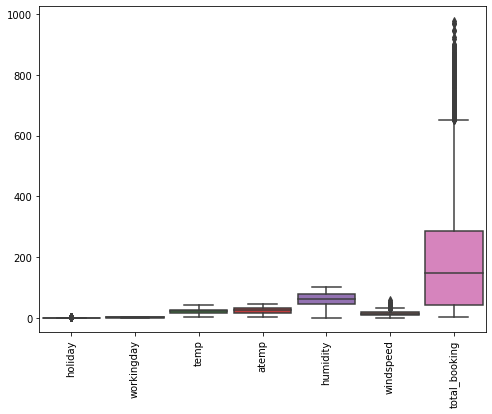

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=train, width= 0.9,ax=ax)
plt.xticks(rotation=90)
plt.show()

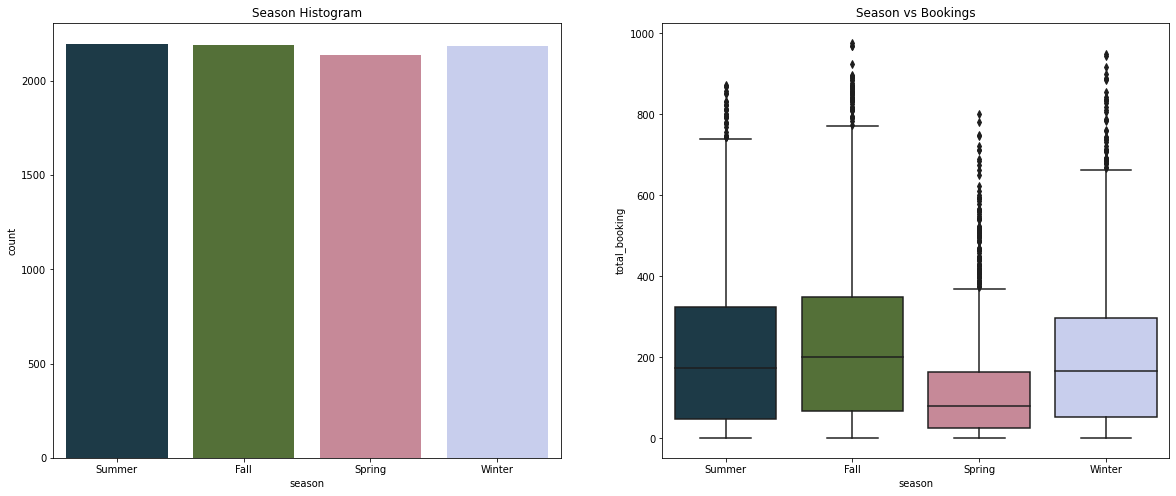

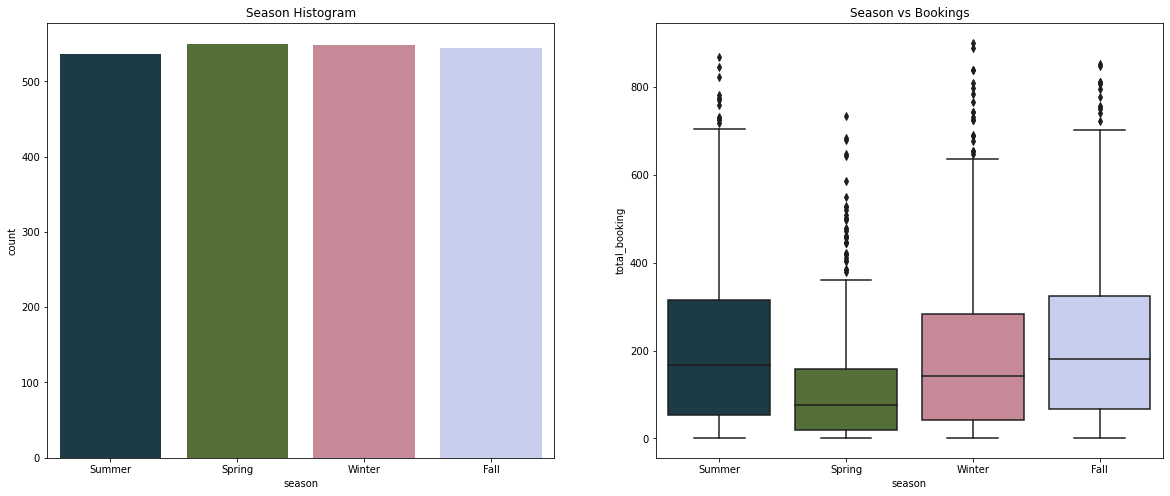

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Season Histogram')
sns.countplot(train.season, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Season vs Bookings')
sns.boxplot(x=train.season, y=train.total_booking, palette=("cubehelix"))

plt.show()


plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Season Histogram')
sns.countplot(test.season, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Season vs Bookings')
sns.boxplot(x=test.season, y=test.total_booking, palette=("cubehelix"))

plt.show()

season doesn't have much impact on total_booking.almost all the seasons have same num of bookings.


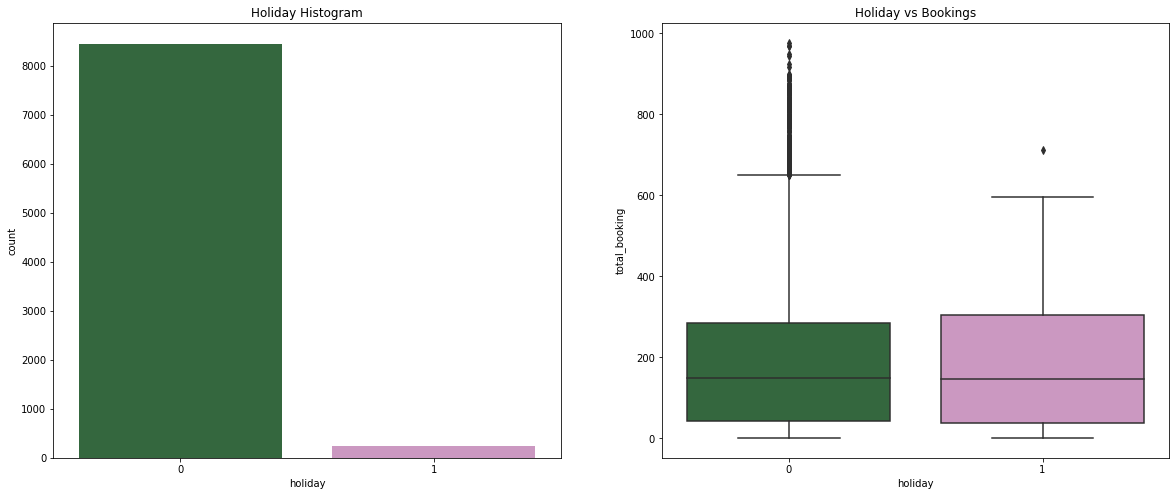

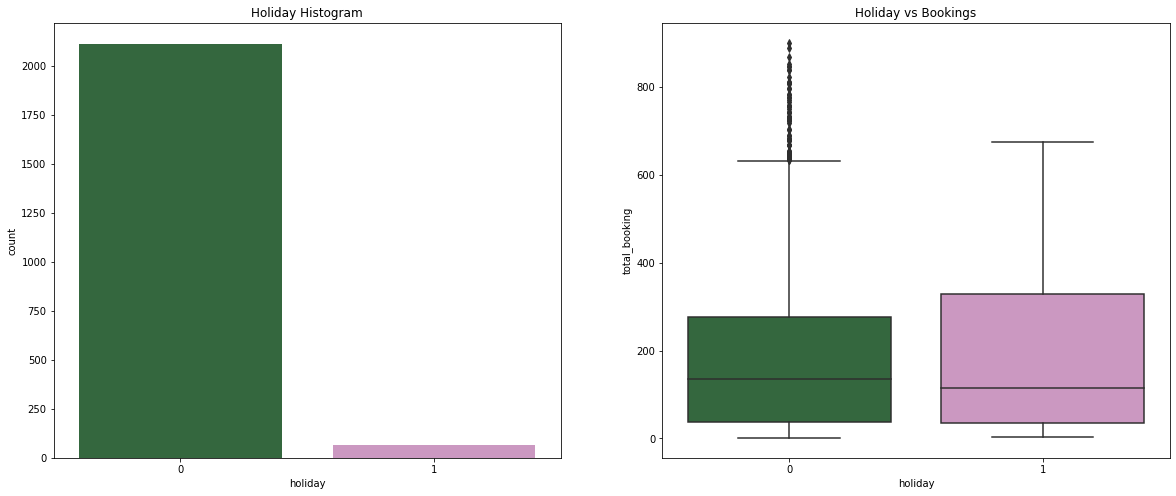

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Holiday Histogram')
sns.countplot(train.holiday, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Holiday vs Bookings')
sns.boxplot(x=train.holiday, y=train.total_booking, palette=("cubehelix"))

plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Holiday Histogram')
sns.countplot(test.holiday, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Holiday vs Bookings')
sns.boxplot(x=test.holiday, y=test.total_booking, palette=("cubehelix"))

plt.show()

Total_bookings are very low during holidays.

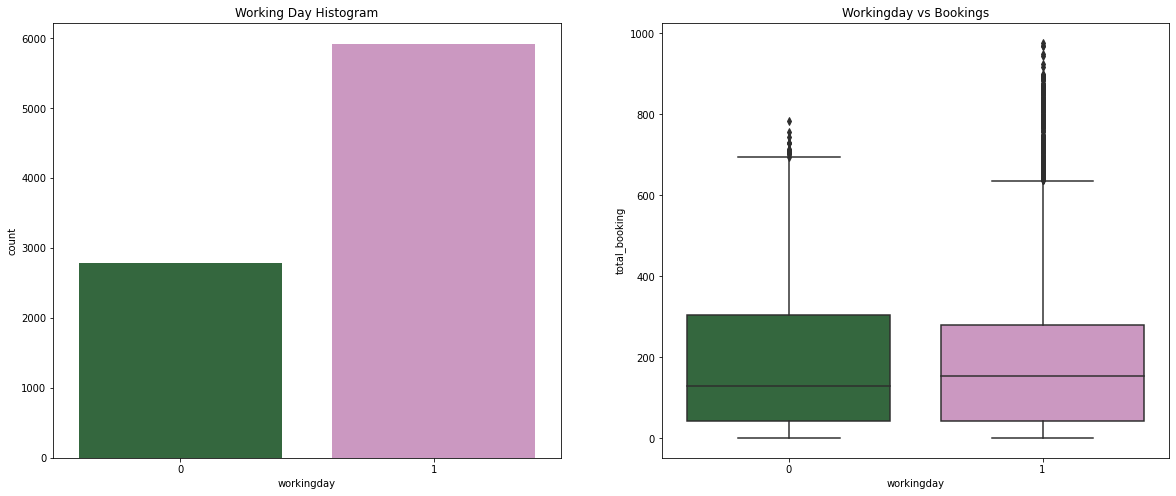

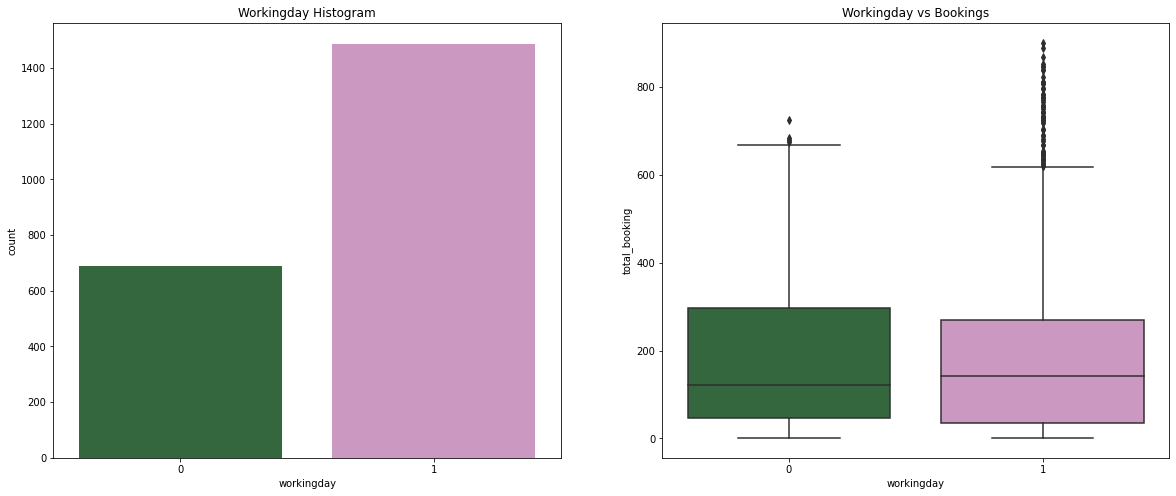

In [25]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Working Day Histogram')
sns.countplot(train.workingday, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Workingday vs Bookings')
sns.boxplot(x=train.workingday, y=train.total_booking, palette=("cubehelix"))

plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Workingday Histogram')
sns.countplot(test.workingday, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Workingday vs Bookings')
sns.boxplot(x=test.workingday, y=test.total_booking, palette=("cubehelix"))

plt.show()

more cabs were booked on working day

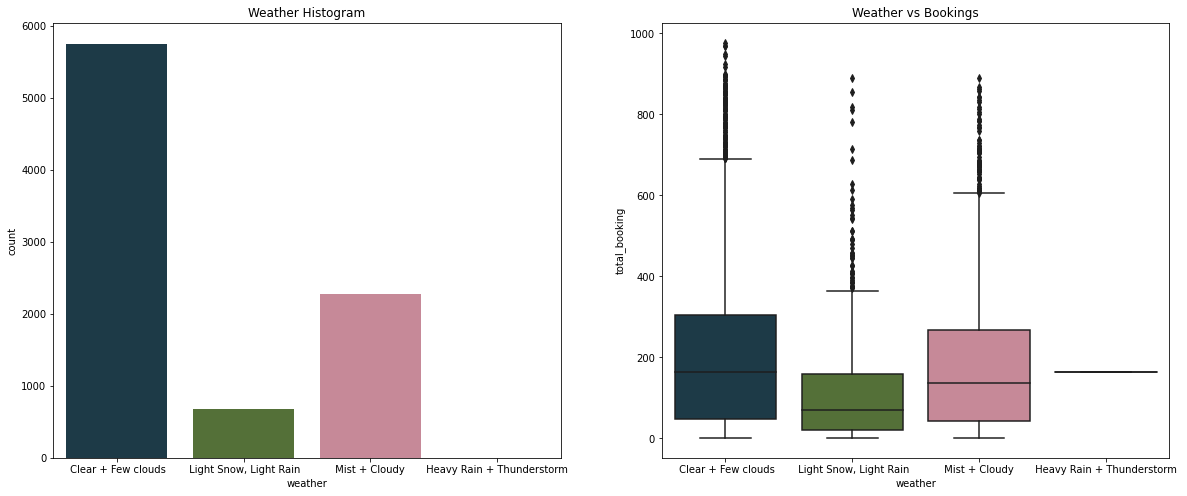

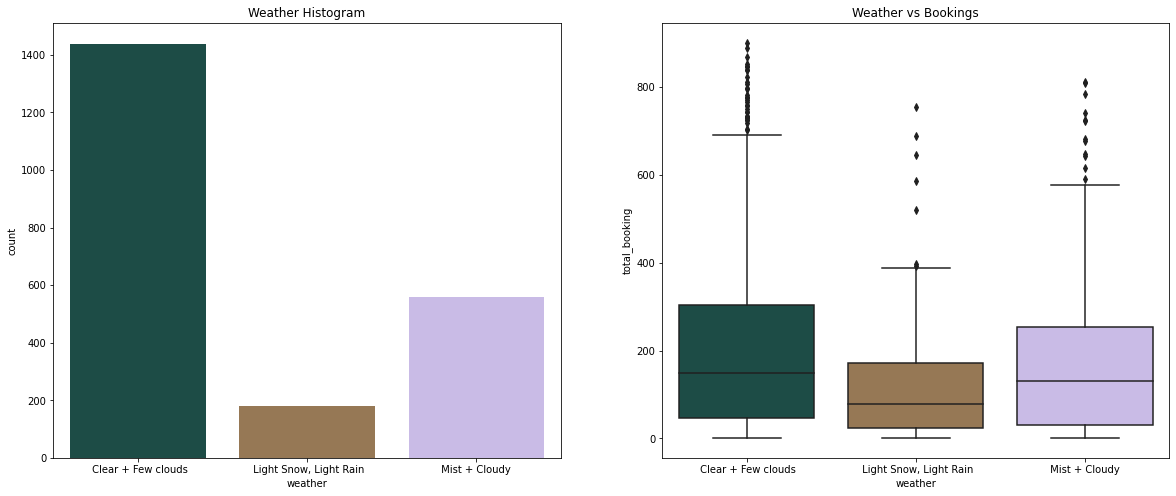

In [26]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Weather Histogram')
sns.countplot(train.weather, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Weather vs Bookings')
sns.boxplot(x=train.weather, y=train.total_booking, palette=("cubehelix"))

plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Weather Histogram')
sns.countplot(test.weather, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Weather vs Bookings')
sns.boxplot(x=test.weather, y=test.total_booking, palette=("cubehelix"))

plt.show()

1.Bookings were high when the weather is Clear+few clouds followed by Mist+Cloudy and Light snow,light rain 
2.There were  almost no bookings when the weather is Heavy Rain+Thunderstorm

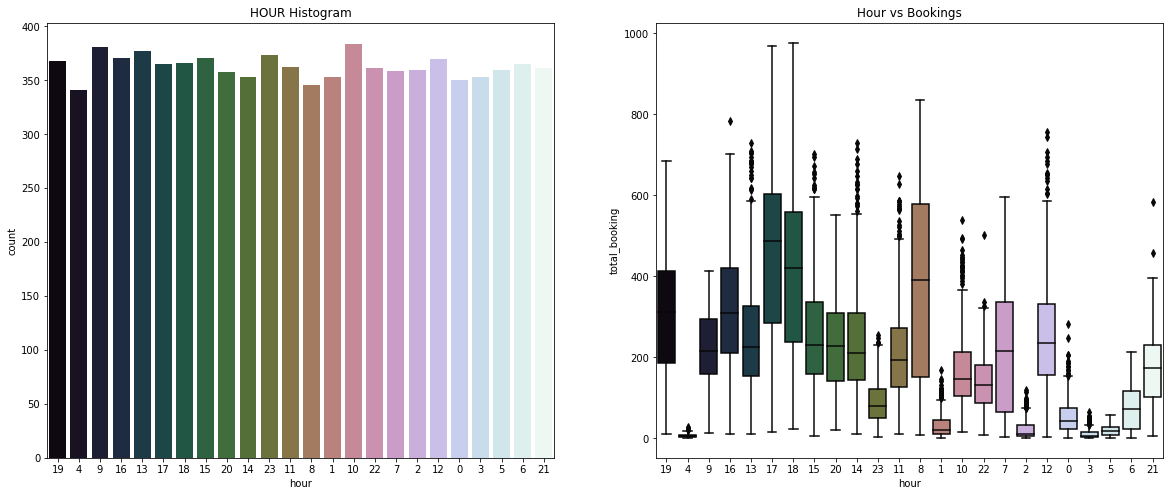

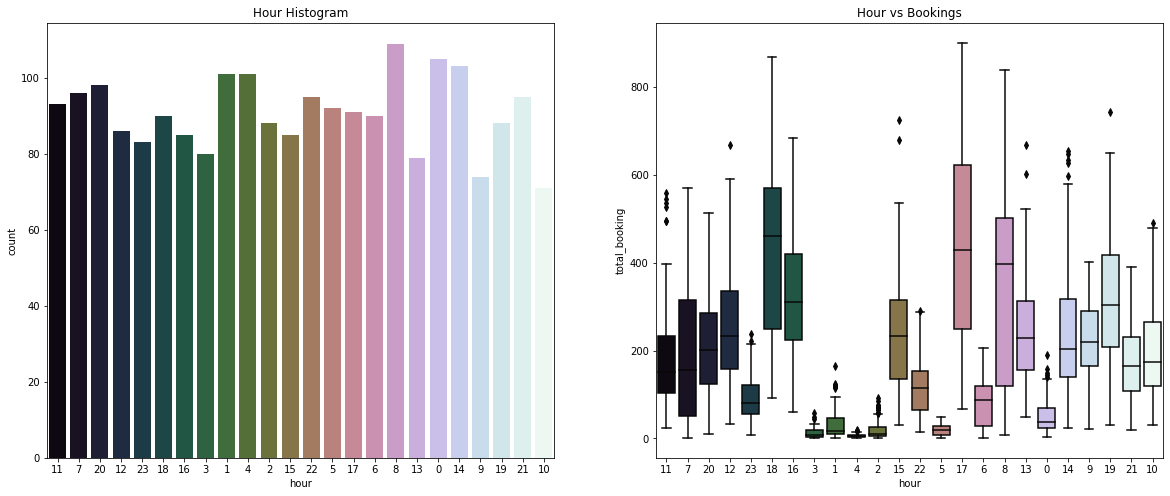

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('HOUR Histogram')
sns.countplot(train.hour, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Hour vs Bookings')
sns.boxplot(x=train.hour, y=train.total_booking, palette=("cubehelix"))

plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Hour Histogram')
sns.countplot(test.hour, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Hour vs Bookings')
sns.boxplot(x=test.hour, y=test.total_booking, palette=("cubehelix"))

plt.show()

1.The bookings were almost same on each hour
2.but there were more cabs booked during 9,10,11,12,19,20,21,22,23 hours

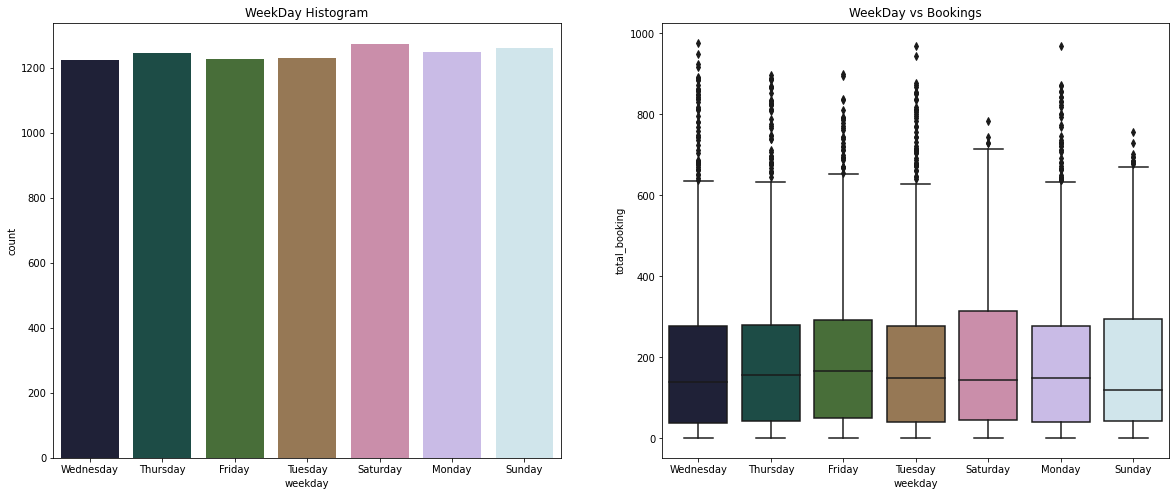

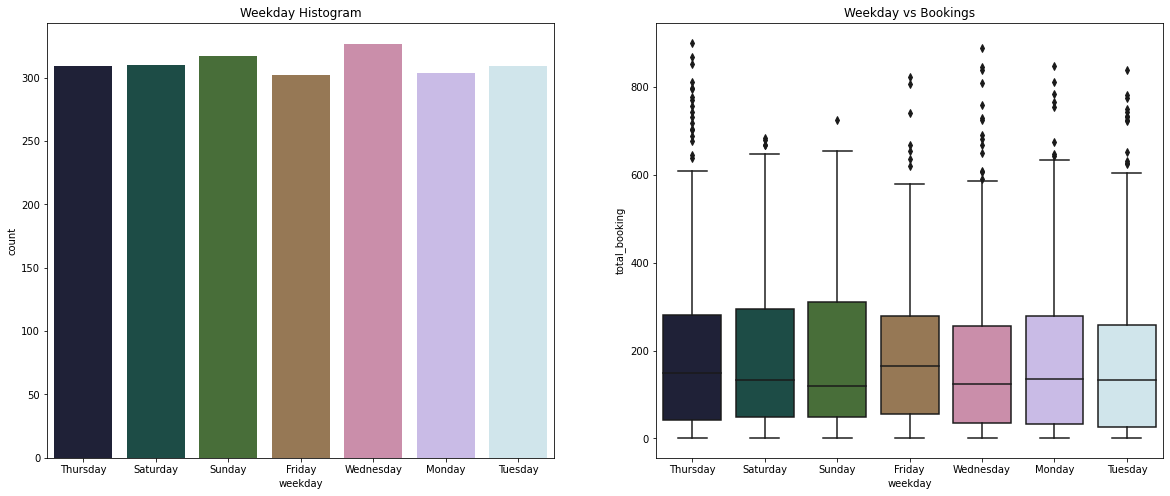

In [28]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('WeekDay Histogram')
sns.countplot(train.weekday, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('WeekDay vs Bookings')
sns.boxplot(x=train.weekday, y=train.total_booking, palette=("cubehelix"))

plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Weekday Histogram')
sns.countplot(test.weekday, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Weekday vs Bookings')
sns.boxplot(x=test.weekday, y=test.total_booking, palette=("cubehelix"))

plt.show()

Almost everyday the bookings are same
Saturday has highest number of bookings

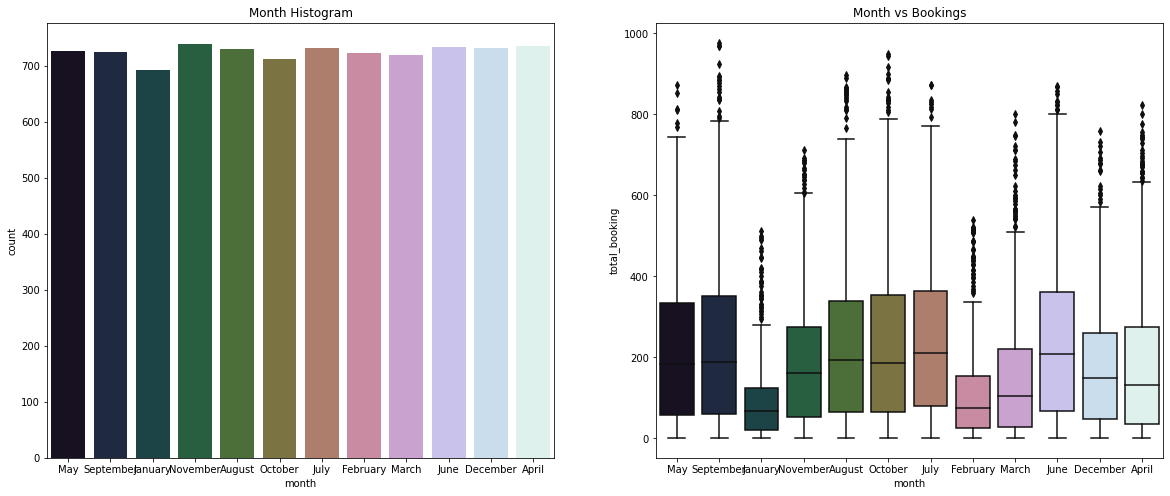

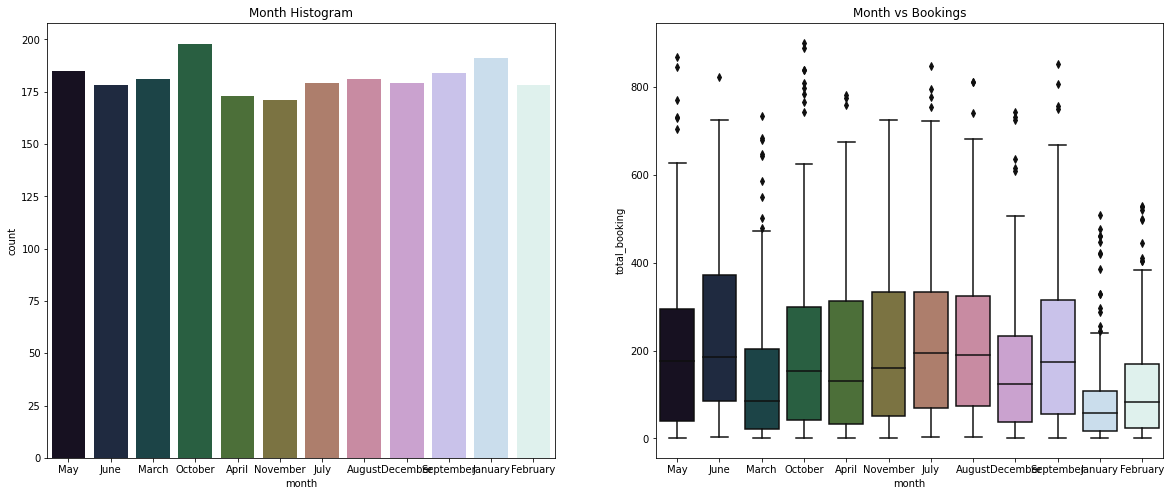

In [29]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Month Histogram')
sns.countplot(train.month, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Month vs Bookings')
sns.boxplot(x=train.month, y=train.total_booking, palette=("cubehelix"))

plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Month Histogram')
sns.countplot(test.month, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Month vs Bookings')
sns.boxplot(x=test.month, y=test.total_booking, palette=("cubehelix"))

plt.show()

the cabs are booked on every month.

Inferenece:


1.there are too many outliers in booking coloumn which need to be deleted

2.the test dataset doesn't contain one category(Heavyrain+Thunderstorm) in weather column

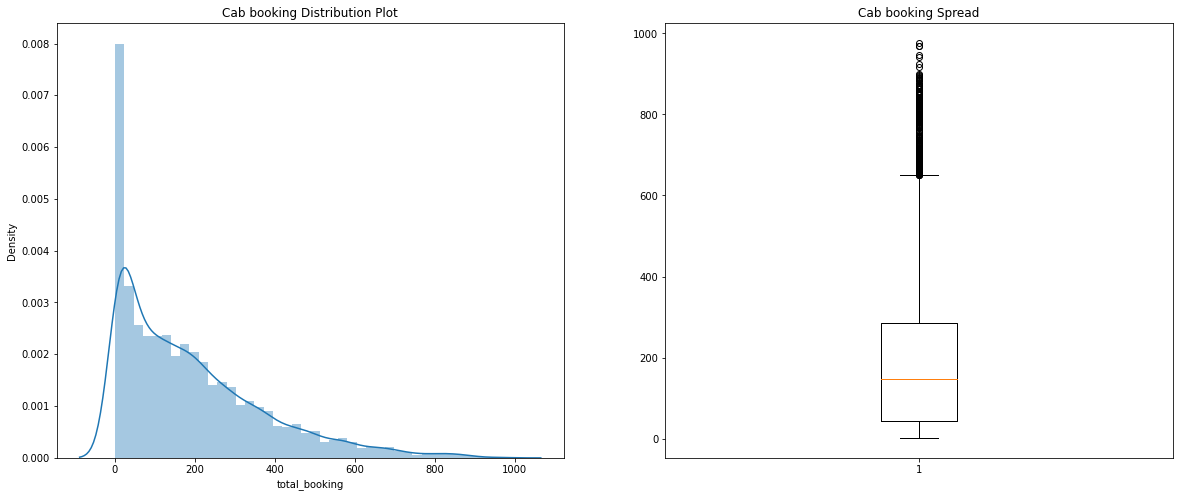

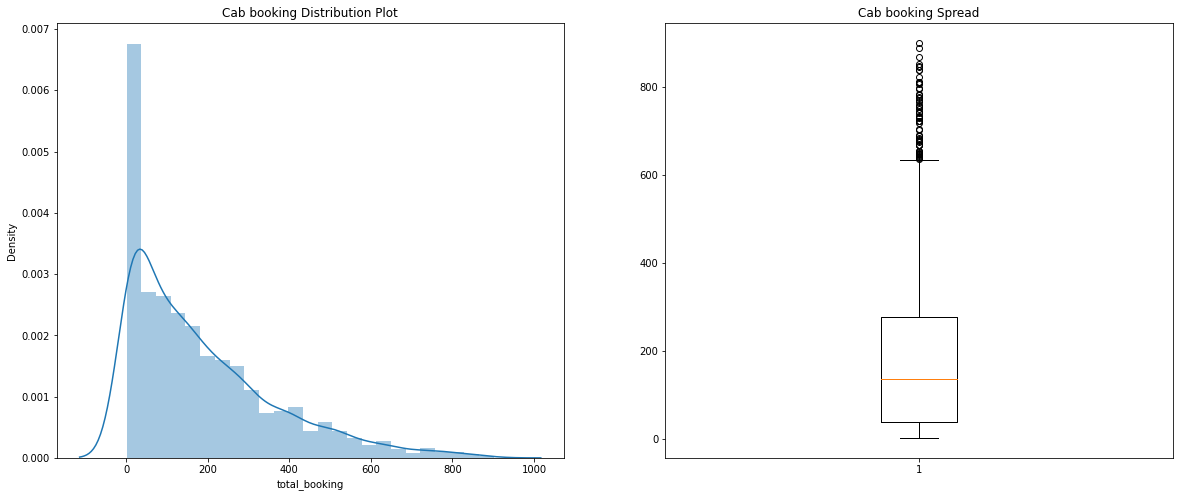

In [30]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Cab booking Distribution Plot')
sns.distplot(train.total_booking )

plt.subplot(1,2,2)
plt.title('Cab booking Spread')
plt.boxplot(train.total_booking)

plt.show()


plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Cab booking Distribution Plot')
sns.distplot(test.total_booking)

plt.subplot(1,2,2)
plt.title('Cab booking Spread')
plt.boxplot(test.total_booking)

plt.show()



Outliers are present in booking column

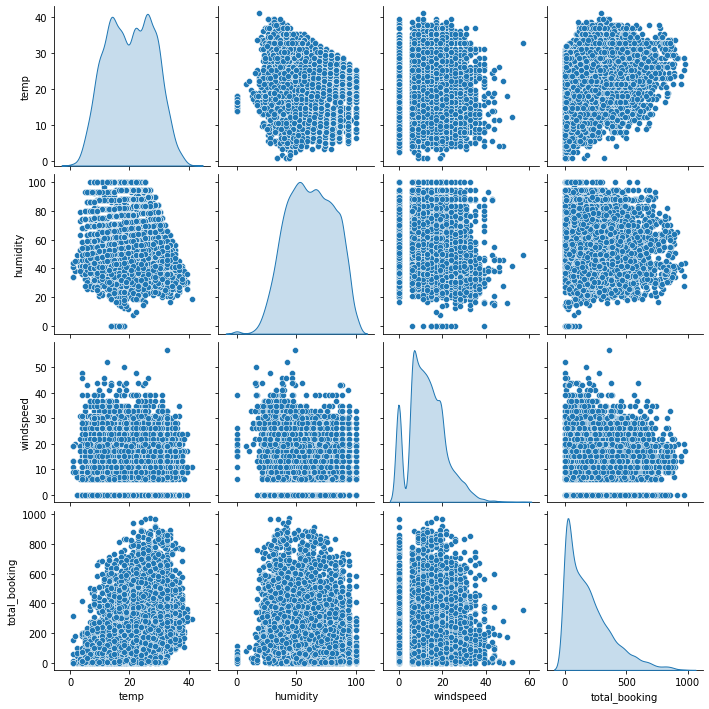

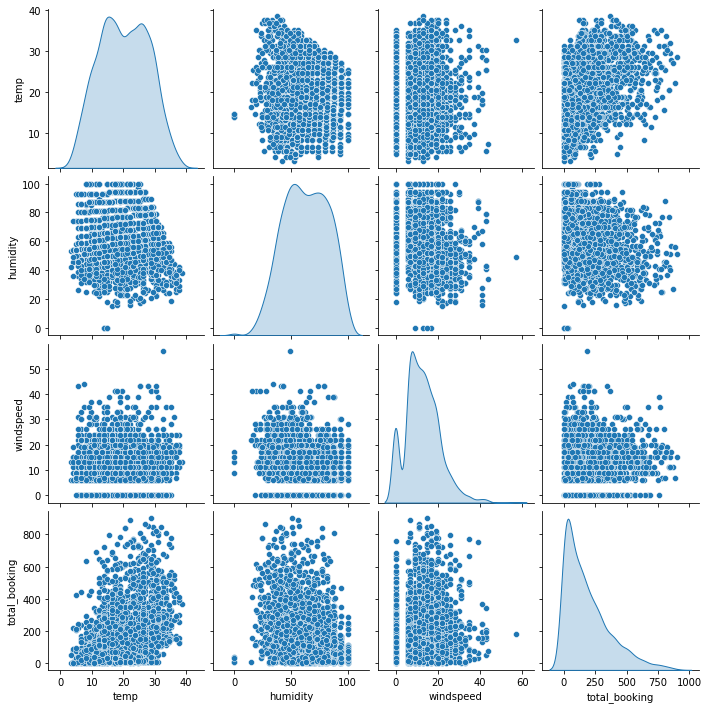

In [31]:
sns.pairplot(train[["temp","humidity","windspeed","total_booking"]], diag_kind ='kde')

sns.pairplot(test[["temp","humidity","windspeed","total_booking"]],diag_kind ='kde')

<AxesSubplot:xlabel='weather', ylabel='total_booking'>

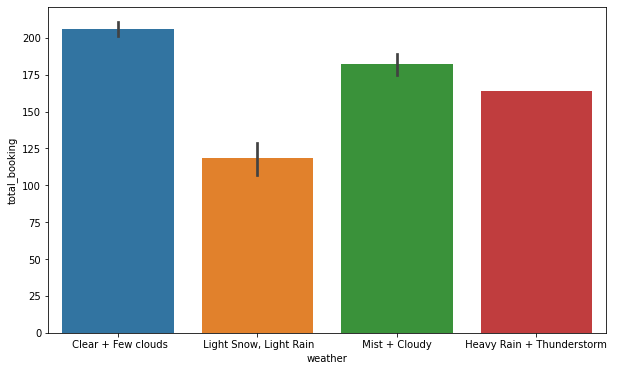

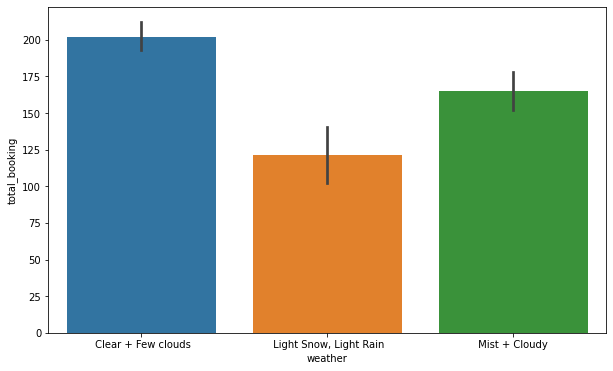

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'weather', y = 'total_booking', data = train)


plt.figure(figsize=(10,6))
sns.barplot(x = 'weather', y = 'total_booking', data = test)


<AxesSubplot:xlabel='weekday', ylabel='total_booking'>

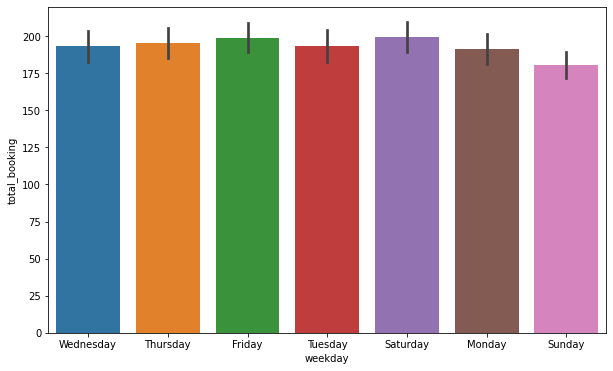

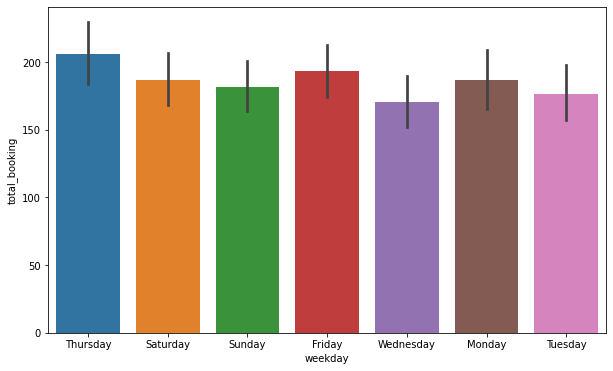

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'weekday', y = 'total_booking', data = train)

plt.figure(figsize=(10,6))
sns.barplot(x = 'weekday', y = 'total_booking', data = test)

<AxesSubplot:xlabel='month', ylabel='total_booking'>

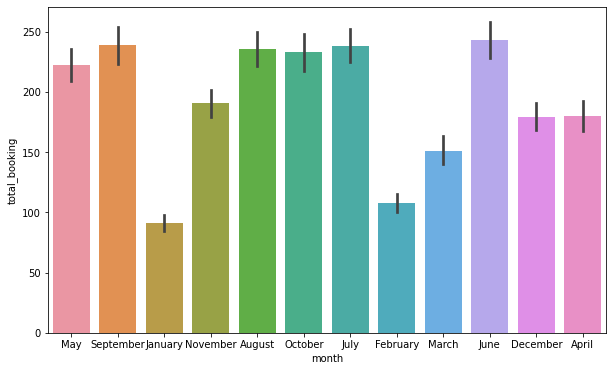

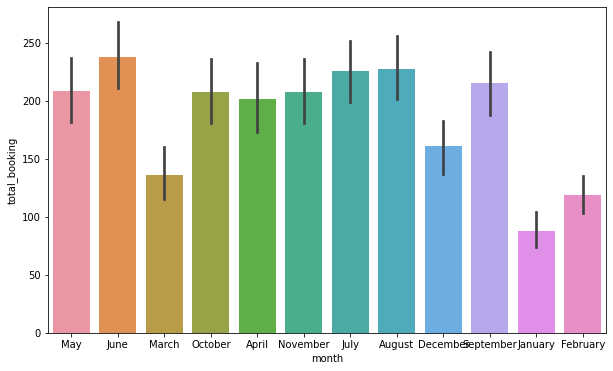

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'month', y = 'total_booking', data = train)

plt.figure(figsize=(10,6))
sns.barplot(x = 'month', y = 'total_booking', data = test)

<AxesSubplot:xlabel='season', ylabel='total_booking'>

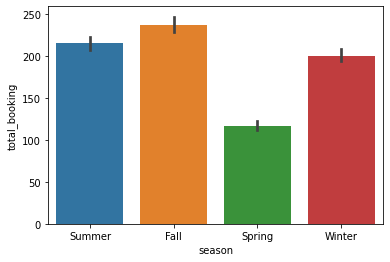

In [35]:
sns.barplot(x = 'season', y = 'total_booking', data = train)


<AxesSubplot:xlabel='season', ylabel='total_booking'>

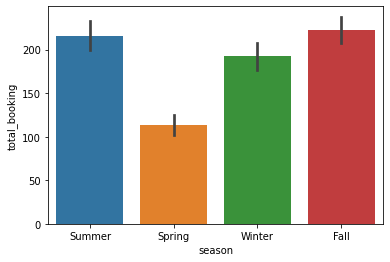

In [36]:
sns.barplot(x = 'season', y = 'total_booking',data = test)

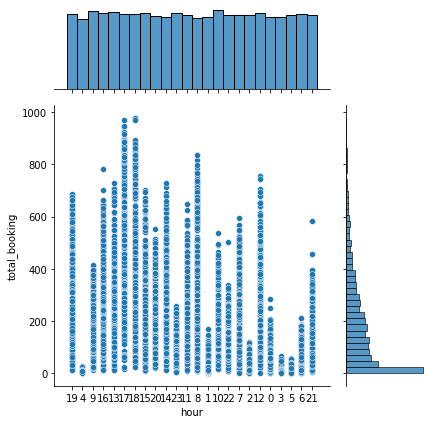

In [37]:

sns.jointplot(train.hour, train.total_booking, kind='scatter',height = 6 ,ratio = 3)
plt.show()






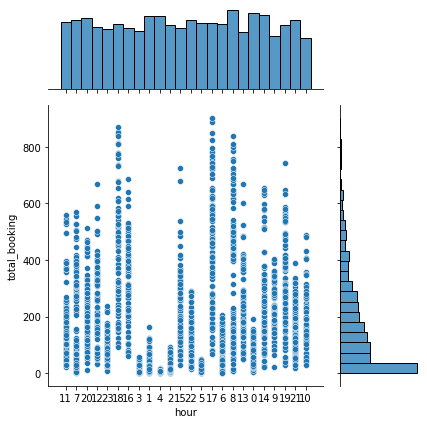

In [38]:

sns.jointplot(test.hour, test.total_booking, kind='scatter',height = 6,ratio = 3)
plt.show()

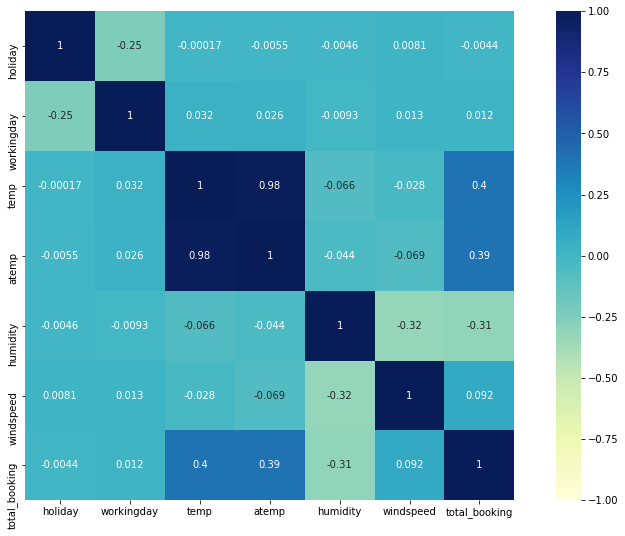

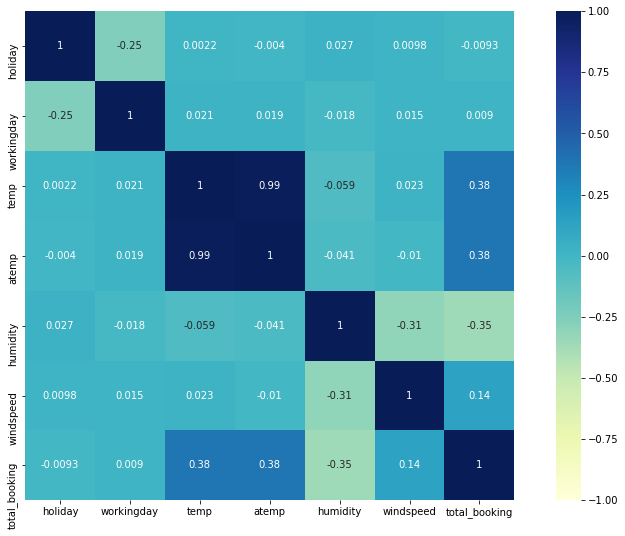

In [39]:
corrmat = train.corr()
fig = plt.figure(figsize = (15,9))

sns.heatmap(corrmat,cmap="YlGnBu", annot = True, vmax = 1, square = True,vmin=-1)
plt.show()

corrmat = test.corr()
fig = plt.figure(figsize = (15,9))

sns.heatmap(corrmat,cmap="YlGnBu", annot = True, vmax = 1, square = True,vmin=-1)
plt.show()

Inference:


1.atemp and temp seems to be highly corealated to avoid multi colinearity we need to drop one column .


2.windspeed seem to be highly corelated with the target column total_booking.


3.total_booking have litte depedency on humidity and temp.

<AxesSubplot:>

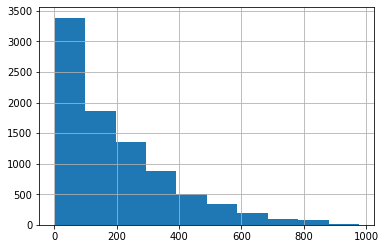

In [40]:
train.total_booking.hist()

<AxesSubplot:>

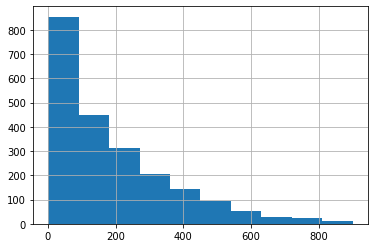

In [41]:
test.total_booking.hist()

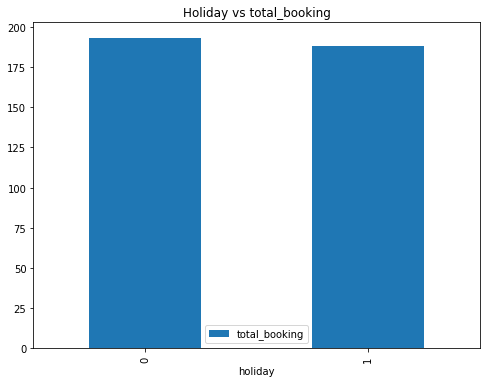

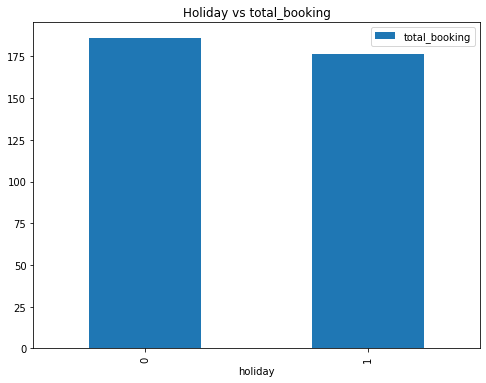

In [42]:
df= pd.DataFrame(train.groupby(['holiday'])['total_booking'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Holiday vs total_booking')
plt.show()

df= pd.DataFrame(test.groupby(['holiday'])['total_booking'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Holiday vs total_booking')
plt.show()

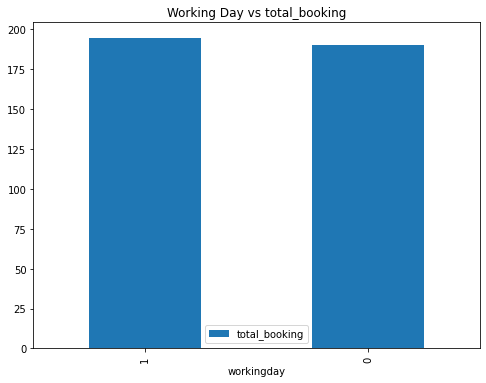

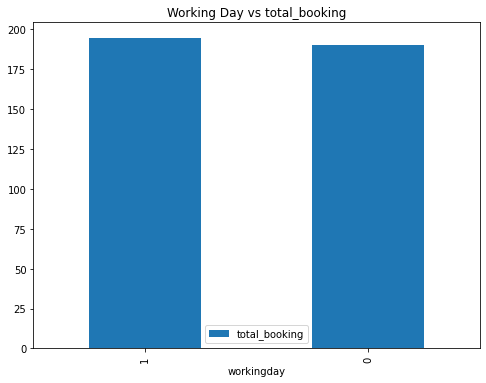

In [43]:
df= pd.DataFrame(train.groupby(['workingday'])['total_booking'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Working Day vs total_booking')
plt.show()

df= pd.DataFrame(train.groupby(['workingday'])['total_booking'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Working Day vs total_booking')
plt.show()

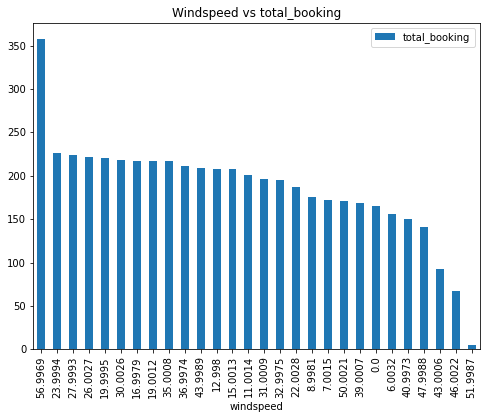

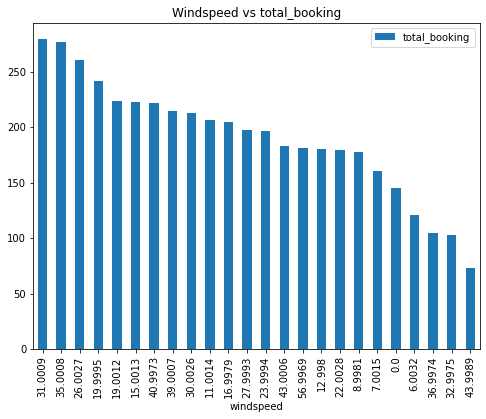

In [44]:
df= pd.DataFrame(train.groupby(['windspeed'])['total_booking'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Windspeed vs total_booking')
plt.show()

df= pd.DataFrame(test.groupby(['windspeed'])['total_booking'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Windspeed vs total_booking')
plt.show()

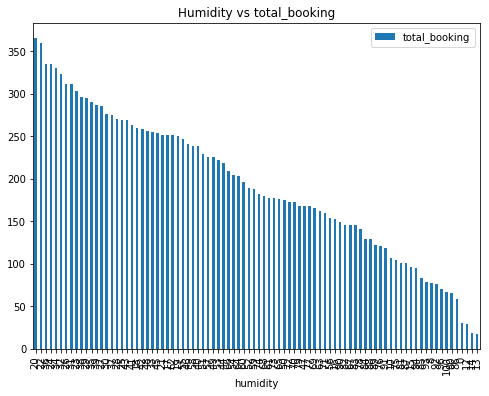

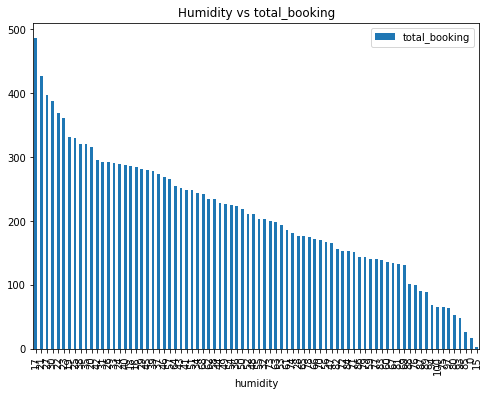

In [45]:
df= pd.DataFrame(train.groupby(['humidity'])['total_booking'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Humidity vs total_booking')
plt.show()

df= pd.DataFrame(test.groupby(['humidity'])['total_booking'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Humidity vs total_booking')
plt.show()

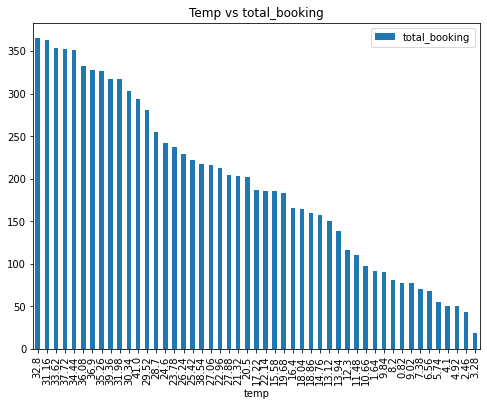

In [46]:
df= pd.DataFrame(train.groupby(['temp'])['total_booking'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Temp vs total_booking')
plt.show()

Inferences:

1.Bookings are high when windspeed is low

2.bookings are high when humidity is low

3.Bookings are high when temp is low

4.Holidays/workingdays doesnt have much impact on booking.

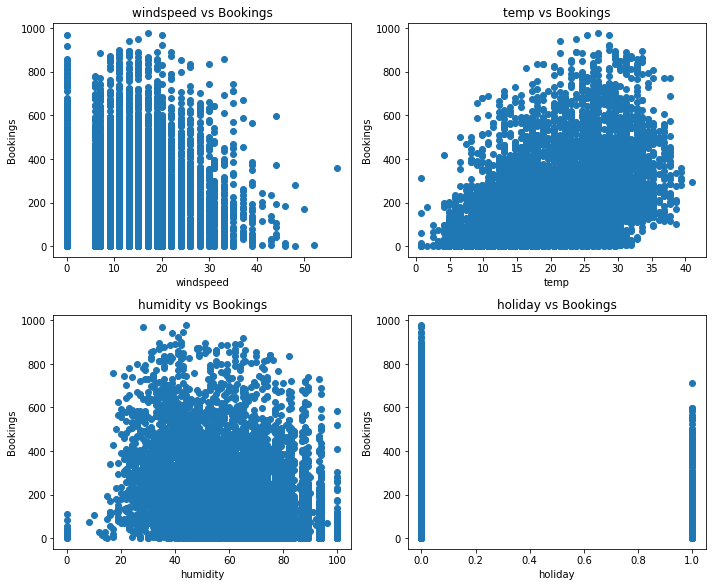

In [47]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(train[x],train['total_booking'])
    plt.title(x+' vs Bookings')
    plt.ylabel('Bookings')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('windspeed', 1)
scatter('temp', 2)
scatter('humidity', 3)
scatter('holiday', 4)

plt.tight_layout()

Checking the Stats

In [48]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [49]:
test.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,total_booking
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000
mean,0.028926,0.683196,20.182241,23.653214,62.835170,12.621496,185.845271
std,0.167636,0.465337,7.704978,8.369721,19.401161,8.060062,179.431987
min,0.000000,0.000000,3.280000,3.790000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,48.000000,7.001500,38.000000
50%,0.000000,1.000000,20.500000,24.240000,63.000000,11.001400,136.000000
75%,0.000000,1.000000,26.240000,31.060000,78.000000,16.997900,277.000000
max,1.000000,1.000000,38.540000,44.695000,100.000000,56.996900,901.000000


# Outlier Analysis(using IQR method to delete outliers in booking column)

In [50]:
booking_stat=train.total_booking.describe()
print(booking_stat)
# calculating interquartile range
iqr=booking_stat['75%']-booking_stat['25%']
upper=booking_stat['75%']+1.5*iqr
lower=booking_stat['25%']-1.5*iqr
print()
print('The upper and lower bounds for suspected outliers are {} and {}'.format(lower,upper))


count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: total_booking, dtype: float64

The upper and lower bounds for suspected outliers are -321.5 and 650.5


In [51]:
outliers=train[train.total_booking>upper].index.tolist()
train[train.total_booking>upper]
#there are 270 ouliers in booking column which can affect our model performance badly.so i'll delete them.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,date,hour,weekday,month
5,8/17/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791,8/17/2012,17,Friday,August
27,5/2/2012 18:00,Summer,0,1,Clear + Few clouds,22.96,26.515,73,15.0013,813,5/2/2012,18,Wednesday,May
30,7/10/2012 17:00,Fall,0,1,Clear + Few clouds,31.98,35.605,49,12.9980,872,7/10/2012,17,Tuesday,July
52,6/5/2012 18:00,Summer,0,1,Clear + Few clouds,24.60,31.060,43,12.9980,790,6/5/2012,18,Tuesday,June
70,5/18/2012 18:00,Summer,0,1,Clear + Few clouds,26.24,31.060,38,15.0013,669,5/18/2012,18,Friday,May
82,3/12/2012 18:00,Spring,0,1,Mist + Cloudy,24.60,31.060,43,12.9980,712,3/12/2012,18,Monday,March
105,9/18/2012 8:00,Fall,0,1,Mist + Cloudy,27.06,30.305,83,36.9974,672,9/18/2012,8,Tuesday,September
112,11/11/2012 16:00,Winter,0,0,Clear + Few clouds,22.14,25.760,42,15.0013,653,11/11/2012,16,Sunday,November
125,12/18/2012 8:00,Winter,0,1,Clear + Few clouds,15.58,19.695,94,0.0000,662,12/18/2012,8,Tuesday,December
133,9/15/2012 17:00,Fall,0,0,Mist + Cloudy,27.06,31.060,36,16.9979,729,9/15/2012,17,Saturday,September


In [52]:
for idx in outliers:
    train.drop(idx,inplace= True)

In [53]:
print(train.shape)
print(test.shape)

(8466, 14)
(2178, 14)


###### Checking Categorical Columns:

There are some categorical columns in the data so we choose to encode them.

In [54]:
#checking categorical columns
# Segregating Categorical variables
columns = train.columns

cat_col= [col for col in train.columns if train[col].dtypes=='O']
cat_col


['datetime', 'season', 'weather', 'date', 'hour', 'weekday', 'month']

In [55]:
columns = test.columns

cat_col= [col for col in test.columns if test[col].dtypes=='O']
cat_col

['datetime', 'season', 'weather', 'date', 'hour', 'weekday', 'month']

In [56]:
print(train.shape)
print(test.shape)

(8466, 14)
(2178, 14)


Dropping Columns which are Unnecessary

In [57]:
train.drop('datetime',axis=1,inplace= True)#datetime is not important as we have extracted imp features like hour and weekday from it
train.drop('atemp',axis = 1,inplace = True)#temp &atemp are highly corelated so dropping atemp to avoid multicolinearity
train.drop('date',axis = 1,inplace = True)


test.drop('datetime',axis=1,inplace= True)#datetime is not important as we have extracted imp features like hour and weekday from it.
test.drop('atemp',axis = 1,inplace = True)#temp &atemp are highly corelated so dropping atemp to avoid multicolinearity
test.drop('date',axis = 1,inplace = True)


Dropped Columns:

1.datetime:dropped beacause we have extracted important features out of it.

2.atemp: dropped beacuse of high co-relation with temp to avoid multi collinearity

3.date :it doen't seem to be important more number of nunique values present in date column to avoid model failure dropping date column.

In [58]:
print(train.shape)
print(test.shape)

(8466, 11)
(2178, 11)


## ENCODING

In [59]:
train = pd.get_dummies(train) #did onehot encoding using pandas
train.head()

,holiday,workingday,temp,humidity,windspeed,total_booking,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_2,hour_20,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,1,22.14,77,16.9979,504,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,28.70,79,19.0012,5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,5.74,50,22.0028,139,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,13.94,29,8.9981,209,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,30.34,51,19.0012,184,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [60]:
train.shape

(8466, 57)

# Splitting the DATA:


In [61]:
X = train.drop('total_booking', axis =1)
y = train['total_booking']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size =0.8, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(6772, 56)
(1694, 56)


# MODEL BUILDING

In [62]:
#Importing Required packages
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (mean_squared_error, mean_absolute_error)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

###### Linear Regression Model

In [65]:
lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred_lm = lm.predict(X_test)
print('prediction for Linear Regression:', y_pred_lm)
y_pred_train = lm.predict(X_train)
print('prediction for train:', y_pred_train)



prediction for Linear Regression: [263.71569824 246.5168457  197.98071289 ... 289.77929688 324.83105469
 307.06188965]
prediction for train: [ 93.12109375 269.26525879 367.95922852 ... 147.83569336 290.8494873
  26.37512207]


In [66]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [69]:
test_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 72.51243654361441
MSE: 9210.733745993635
RMSE: 95.97256767427677
R2 Square 0.6331711406636096
__________________________________
Train set evaluation:
_____________________________________
MAE: 69.492796499632
MSE: 8797.701825516819
RMSE: 93.79606508546517
R2 Square 0.6384861598697774
__________________________________


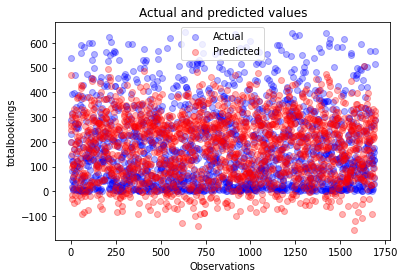

In [70]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred_lm.size), y=y_pred_lm, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('totalbookings')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

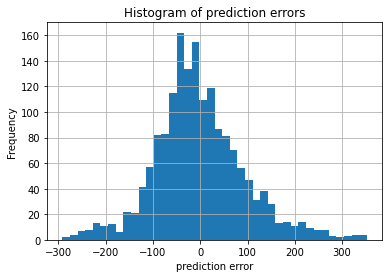

In [71]:
diff = y_test - test_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('prediction error')
plt.ylabel('Frequency')

Text(0.5, 0, 'Errors')

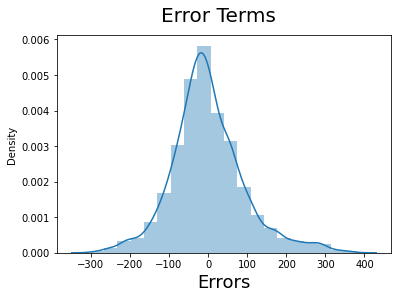

In [72]:
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

###### Decision Tree Model

In [73]:
#calling the model
DT_model = DecisionTreeRegressor()

#fitting the Model
DT_model.fit(X_train,y_train)

# predicting the model
y_pred_DT = DT_model.predict(X_test)
print('prediction for Decision Tree:', y_pred_DT)
y_pred_train = DT_model.predict(X_train)
print('prediction for train:', y_pred_train)


prediction for Decision Tree: [233. 201. 235. ... 179. 516. 606.]
prediction for train: [102. 127. 289. ... 170. 329.  28.]


In [74]:
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 59.18978748524203
MSE: 8344.327184179458
RMSE: 91.34728887153388
R2 Square 0.6676768531895092
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.004725339633786178
MSE: 0.0710277613703485
RMSE: 0.26651034008148444
R2 Square 0.9999970813379132
__________________________________


Text(0, 0.5, 'Frequency')

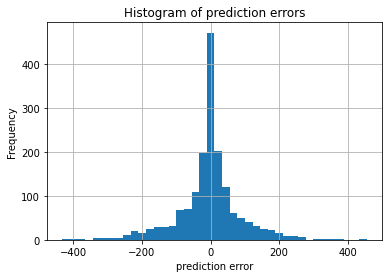

In [75]:
diff = y_test - test_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('prediction error')
plt.ylabel('Frequency')

Text(0.5, 0, 'Errors')

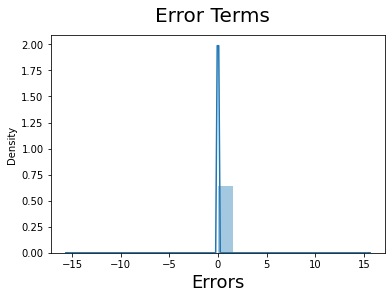

In [76]:
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

###### RANDOM FOREST

In [77]:
RF_model = RandomForestRegressor( random_state = 0)

RF_model.fit(X_train,y_train)

y_pred_RF = RF_model.predict(X_test)
print('prediction for Random Forest:', y_pred_RF)

y_pred_train = RF_model.predict(X_train)
print('prediction for train:', y_pred_train)

prediction for Random Forest: [252.32 311.96 236.31 ... 240.28 396.11 430.75]
prediction for train: [103.88 154.69 335.65 ... 177.29 304.49  30.89]


In [78]:
test_pred = RF_model.predict(X_test)
train_pred = RF_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 44.68902536965199
MSE: 4132.45733999822
RMSE: 64.2841919914859
R2 Square 0.8354197771760357
__________________________________
Train set evaluation:
_____________________________________
MAE: 16.957023922031897
MSE: 622.6764560104248
RMSE: 24.953485848883414
R2 Square 0.974413072727913
__________________________________


Text(0, 0.5, 'Frequency')

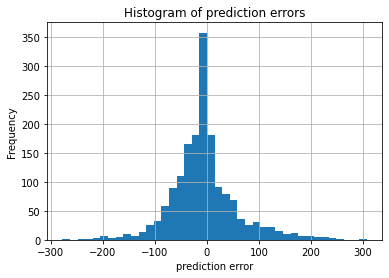

In [79]:
diff = y_test - test_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('prediction error')
plt.ylabel('Frequency')

Text(0.5, 0, 'Errors')

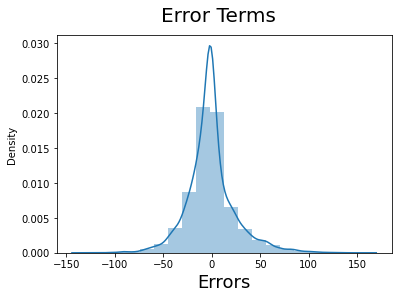

In [80]:
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

###### XG BOOST

In [81]:
XG_model = XGBRFRegressor()

XG_model.fit(X_train, y_train)

y_pred_XG = XG_model.predict(X_test)


In [82]:
test_pred = XG_model.predict(X_test)
train_pred = XG_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 86.42678362588534
MSE: 12226.842270076166
RMSE: 110.57505265689981
R2 Square 0.5130508896569834
__________________________________
Train set evaluation:
_____________________________________
MAE: 81.47248822362621
MSE: 11025.681108895446
RMSE: 105.00324332560136
R2 Square 0.5469343702730127
__________________________________


Text(0.5, 0, 'Errors')

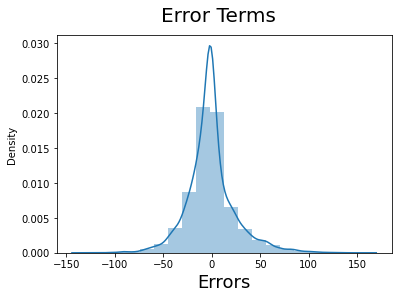

In [83]:
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

###### SVR

In [84]:

SVM_model = SVR()
SVM_model.fit(X_train, y_train)
y_pred_SVM = SVM_model.predict(X_test)
print('prediction for SVM:', y_pred_SVM)

prediction for SVM: [232.48369253 225.18810501 139.69064743 ... 170.92009002 118.96599916
 186.19533109]


In [85]:
test_pred = SVM_model.predict(X_test)
train_pred = SVM_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 108.31720516160352
MSE: 20891.623476073764
RMSE: 144.53934923083668
R2 Square 0.1679652652268958
__________________________________
Train set evaluation:
_____________________________________
MAE: 105.99260494272794
MSE: 20257.87499420065
RMSE: 142.3301619271216
R2 Square 0.16756644777498242
__________________________________


Text(0.5, 0, 'Errors')

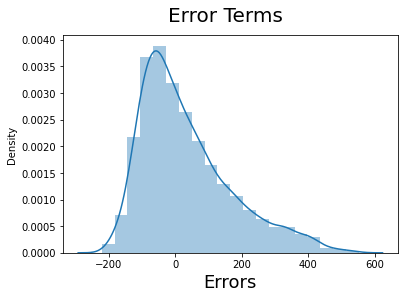

In [87]:
fig = plt.figure()
sns.distplot((y_train - train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

###### KNN

In [88]:

KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train, y_train)
y_pred_KNN = KNN_model.predict(X_test)
print('prediction for KNN:', y_pred_KNN)


prediction for KNN: [351.6 393.  205.8 ... 226.2 405.4 306.2]


In [89]:
test_pred = KNN_model.predict(X_test)
train_pred = KNN_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 105.77367178276272
MSE: 19113.353978748524
RMSE: 138.25105416866998
R2 Square 0.23878704656220506
__________________________________
Train set evaluation:
_____________________________________
MAE: 81.96704075605435
MSE: 12062.276018901359
RMSE: 109.82839350050314
R2 Square 0.5043387681478332
__________________________________


Text(0.5, 0, 'Errors')

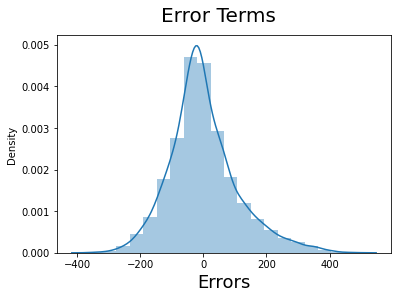

In [90]:
fig = plt.figure()
sns.distplot((y_train - train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

In [91]:
# Gradient Boosting
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_pred_GB = GB_model.predict(X_test)
#print('prediction for GB:', y_pred_GB)
print("R squared:",r2_score(y_test,y_pred_GB))

R squared: 0.7178469375441439


In [92]:
test_pred = GB_model.predict(X_test)
train_pred = GB_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 62.02945729854188
MSE: 7084.602718005924
RMSE: 84.17008208387303
R2 Square 0.7178469375441439
__________________________________
Train set evaluation:
_____________________________________
MAE: 59.54936575053324
MSE: 6754.554023582468
RMSE: 82.18609385767442
R2 Square 0.7224428820319906
__________________________________


Text(0.5, 0, 'Errors')

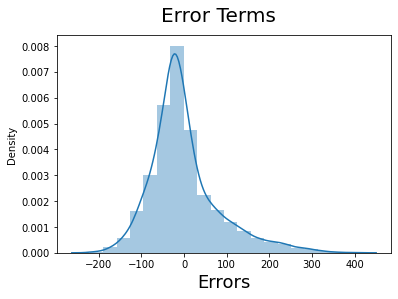

In [222]:
fig = plt.figure()
sns.distplot((y_train - train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

###### RANDOM FOREST REGRESSOR

In [223]:

from sklearn.ensemble import RandomForestRegressor

RF_Model = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, random_state=0)  


RF_Model = RF_Model.fit(X_train, y_train)


y_train_pred_RF = RF_Model.predict(X_train)
y_pred_RFR = RF_Model.predict(X_test)

print("R squared:",r2_score(y_test,y_pred_RFR))

R squared: 0.8382149833105221


In [224]:
test_pred = RF_Model.predict(X_test)
train_pred = RF_Model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 44.24495140200708
MSE: 4062.2722964427617
RMSE: 63.73595764121507
R2 Square 0.8382149833105221
__________________________________
Train set evaluation:
_____________________________________
MAE: 16.66373544215678
MSE: 591.0337820613588
RMSE: 24.311186356518245
R2 Square 0.9757133287263757
__________________________________


Text(0.5, 0, 'Errors')

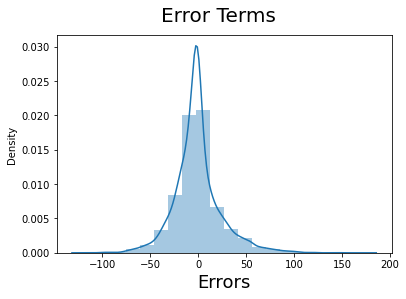

In [225]:
fig = plt.figure()
sns.distplot((y_train - train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

###### Ada Boost Regressor

In [226]:
Ada_Model = AdaBoostRegressor() 


Ada_Model = Ada_Model.fit(X_train, y_train)


y_train_pred_Ada = Ada_Model.predict(X_train)
y_pred_Ada = Ada_Model.predict(X_test)

print("R squared:",r2_score(y_test,y_pred_Ada))

R squared: 0.3040253638777305


In [227]:
test_pred = Ada_Model.predict(X_test)
train_pred = Ada_Model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 109.71903799836451
MSE: 17475.28010441652
RMSE: 132.19410011198124
R2 Square 0.3040253638777305
__________________________________
Train set evaluation:
_____________________________________
MAE: 107.07396576031023
MSE: 16710.60819847435
RMSE: 129.26951766938078
R2 Square 0.3133302013918665
__________________________________


Text(0.5, 0, 'Errors')

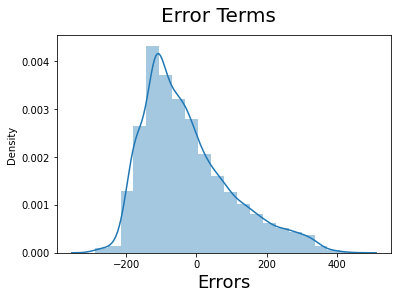

In [228]:
fig = plt.figure()
sns.distplot((y_train - train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

###### BaggingRegressor

In [229]:
Bagging_Model = BaggingRegressor() 


Bagging_Model = Bagging_Model.fit(X_train, y_train)


y_train_pred_Bagging = Bagging_Model.predict(X_train)
y_pred_Bagging = Bagging_Model.predict(X_test)

print("R squared:",r2_score(y_test,y_pred_Bagging))

R squared: 0.8172999718959223


In [230]:
test_pred = Bagging_Model.predict(X_test)
train_pred = Bagging_Model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 46.17180735930735
MSE: 4587.428909755017
RMSE: 67.73056112092249
R2 Square 0.8172999718959223
__________________________________
Train set evaluation:
_____________________________________
MAE: 19.076708013388462
MSE: 911.4163428455405
RMSE: 30.18967278467159
R2 Square 0.9625482167281592
__________________________________


Text(0.5, 0, 'Errors')

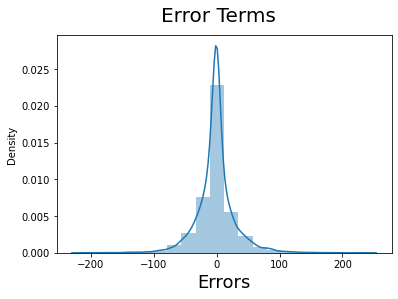

In [231]:
fig = plt.figure()
sns.distplot((y_train - train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

###### Avg Model

In [348]:
pred_1 = lm.predict(X_test)
pred_2 = DT_model.predict(X_test)
pred_3 = RF_model.predict(X_test)
pred_4 = SVM_model.predict(X_test)
pred_5 = KNN_model.predict(X_test)
pred_6 = XG_model.predict(X_test)
pred_7 = GB_model.predict(X_test)
pred_8 = RF_Model.predict(X_test)
pred_9 = Ada_Model.predict(X_test)
pred_10 = Bagging_Model.predict(X_test)
 
# final prediction after averaging on the prediction of all the models
pred_final = (pred_1+pred_2+pred_3+pred_4+pred_5+
              pred_6+pred_7+pred_8+pred_9+pred_10)/10.0
 
# printing the root mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred_final))

6805.8265789986035


In [ ]:
#Initializae the evaluation dictionary
def initialize_evaluator():
    return {'Model':[],'R2':[],'MAE':[],'MSE':[],'RMSE':[]}

#Insert data in evaluation dictionary
def insert_data(test,pred,model):
    eval_data=initialize_evaluator()
    eval_data['Model'].append(model)
    eval_data['R2'].append(r2_score(test,pred))
    eval_data['MAE'].append(mean_absolute_error(test,pred))
    eval_data['MSE'].append(mean_squared_error(test,pred))
    eval_data['RMSE'].append(np.sqrt(np.absolute(mean_squared_error(test,pred))))
    return eval_data

# Append data of one dictionary to another
def append_data(data1, data2):
    for i in data1.keys():
        data2[i].extend(data1[i])
    return data2

In [422]:
eval_data=insert_data(mean_lr.predict(mX_test),my_test,'Mean Linear Regression')
zero_evl_data=insert_data(zero_lr.predict(zX_test),zy_test,'Zero Linear Regression')
eval_data=append_data(zero_evl_data,eval_data)

In [427]:
model_1=insert_data(lm.predict(X_test),y_test,'Linear Regression')
model_2=insert_data(DT_model.predict(X_test),y_test,'Decision Tree Regression')
model=append_data(model_1,model_2)

In [428]:
model = pd.DataFrame(model)
model

,Model,R2,MAE,MSE,RMSE
0,Decision Tree Regression,0.666953,59.168831,8443.621015,91.889178
1,Linear Regression,0.433070,72.512437,9210.733746,95.972568


###### GridSearch CV

In [350]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid  
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,30,40,],
    'n_estimators': [300, 500, 1000, 1200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator =RF_Model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40],
                         'n_estimators': [300, 500, 1000, 1200]},
             verbose=2)

In [160]:
grid_search.best_params_


{'bootstrap': True, 'max_depth': 40, 'n_estimators': 1200}

In [161]:
cvrf_grid = grid_search.best_estimator_

#Predict the model
pred_clf = cvrf_grid.predict(X_train)
y_pred_clf = cvrf_grid.predict(X_test)
print("R squared value for GridSearch :", r2_score(y_test, y_pred_clf))
print("MSE for GridSearch :", mean_squared_error(y_test, y_pred_clf))

R squared value for GridSearch : 0.8382697341494291
MSE for GridSearch : 4060.897553461924


Text(0, 0.5, 'y_pred')

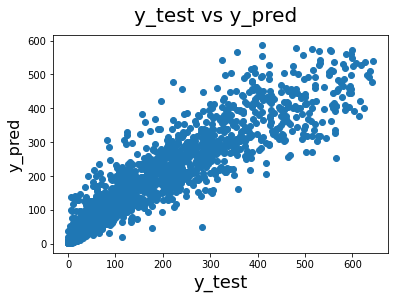

In [353]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_clf,)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [354]:
test.head()


,season,holiday,workingday,weather,temp,humidity,windspeed,total_booking,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,21.32,48,35.0008,256,11,Thursday,May
1,Summer,0,0,Clear + Few clouds,23.78,64,7.0015,87,7,Saturday,June
2,Spring,0,0,"Light Snow, Light Rain",11.48,100,27.9993,11,20,Sunday,March
3,Winter,0,1,Mist + Cloudy,25.42,83,0.0000,84,11,Thursday,October
4,Summer,0,0,Clear + Few clouds,25.42,43,23.9994,668,12,Saturday,June


In [355]:
test.shape

(2178, 11)

In [356]:
test = pd.get_dummies(test)

In [357]:
test.shape

(2178, 56)

In [358]:
# Fitting Grid Search Model to test dataset
New_pred = cvrf_grid.predict(test)
print("R squared for prediction v/s test_label:",r2_score(test_label, New_pred))
print("MSE for prediction v/s test_label :", mean_squared_error(test_label, New_pred))


R squared for prediction v/s test_label: 0.797753772723576
MSE for prediction v/s test_label : 6508.497062539411


Text(0, 0.5, 'Test_label')

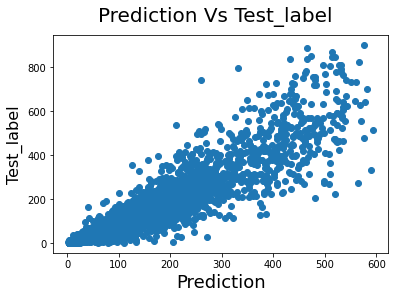

In [362]:
fig = plt.figure()
plt.scatter(New_pred,test_label)
fig.suptitle('Prediction Vs Test_label', fontsize=20)              # Plot heading 
plt.xlabel('Prediction', fontsize=18)                          # X-label
plt.ylabel('Test_label', fontsize=16)   

In [359]:
New_pred = pd.DataFrame(New_pred)
New_pred.columns = ['Predicted_Bookings']
New_pred

,Predicted_Bookings
0,214.892812
1,157.762059
2,77.260000
3,164.358417
4,444.000000
...,...
2173,12.273333
2174,138.090833
2175,135.948958
2176,24.306667


In [363]:
df = pd.read_csv(r"C:\Users\Avinash\OneDrive\Desktop\h\test_label.csv",header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Avinash\\OneDrive\\Desktop\\h\\test_label.csv'

In [177]:
data_test['Actual_Totalbookings'] = df[0]

In [178]:
data_test.shape

(2178, 2)

In [179]:
data_test.head()

,0,Actual_Totalbookings
0,256,256
1,87,87
2,11,11
3,84,84
4,668,668


In [180]:
data_test = data_test.join(New_pred)

In [181]:
data_test.head()

,0,Actual_Totalbookings,Predicted_Bookings
0,256,256,214.892812
1,87,87,157.762059
2,11,11,77.260000
3,84,84,164.358417
4,668,668,444.000000


In [232]:
data_test

,0,Actual_Totalbookings,Predicted_Bookings
0,256,256,214.892812
1,87,87,157.762059
2,11,11,77.260000
3,84,84,164.358417
4,668,668,444.000000
...,...,...,...
2173,3,3,12.273333
2174,144,144,138.090833
2175,159,159,135.948958
2176,29,29,24.306667
